<a href="https://colab.research.google.com/github/leajag/2024_Intro_Python/blob/main/W2_S1_Lea_Jaeggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

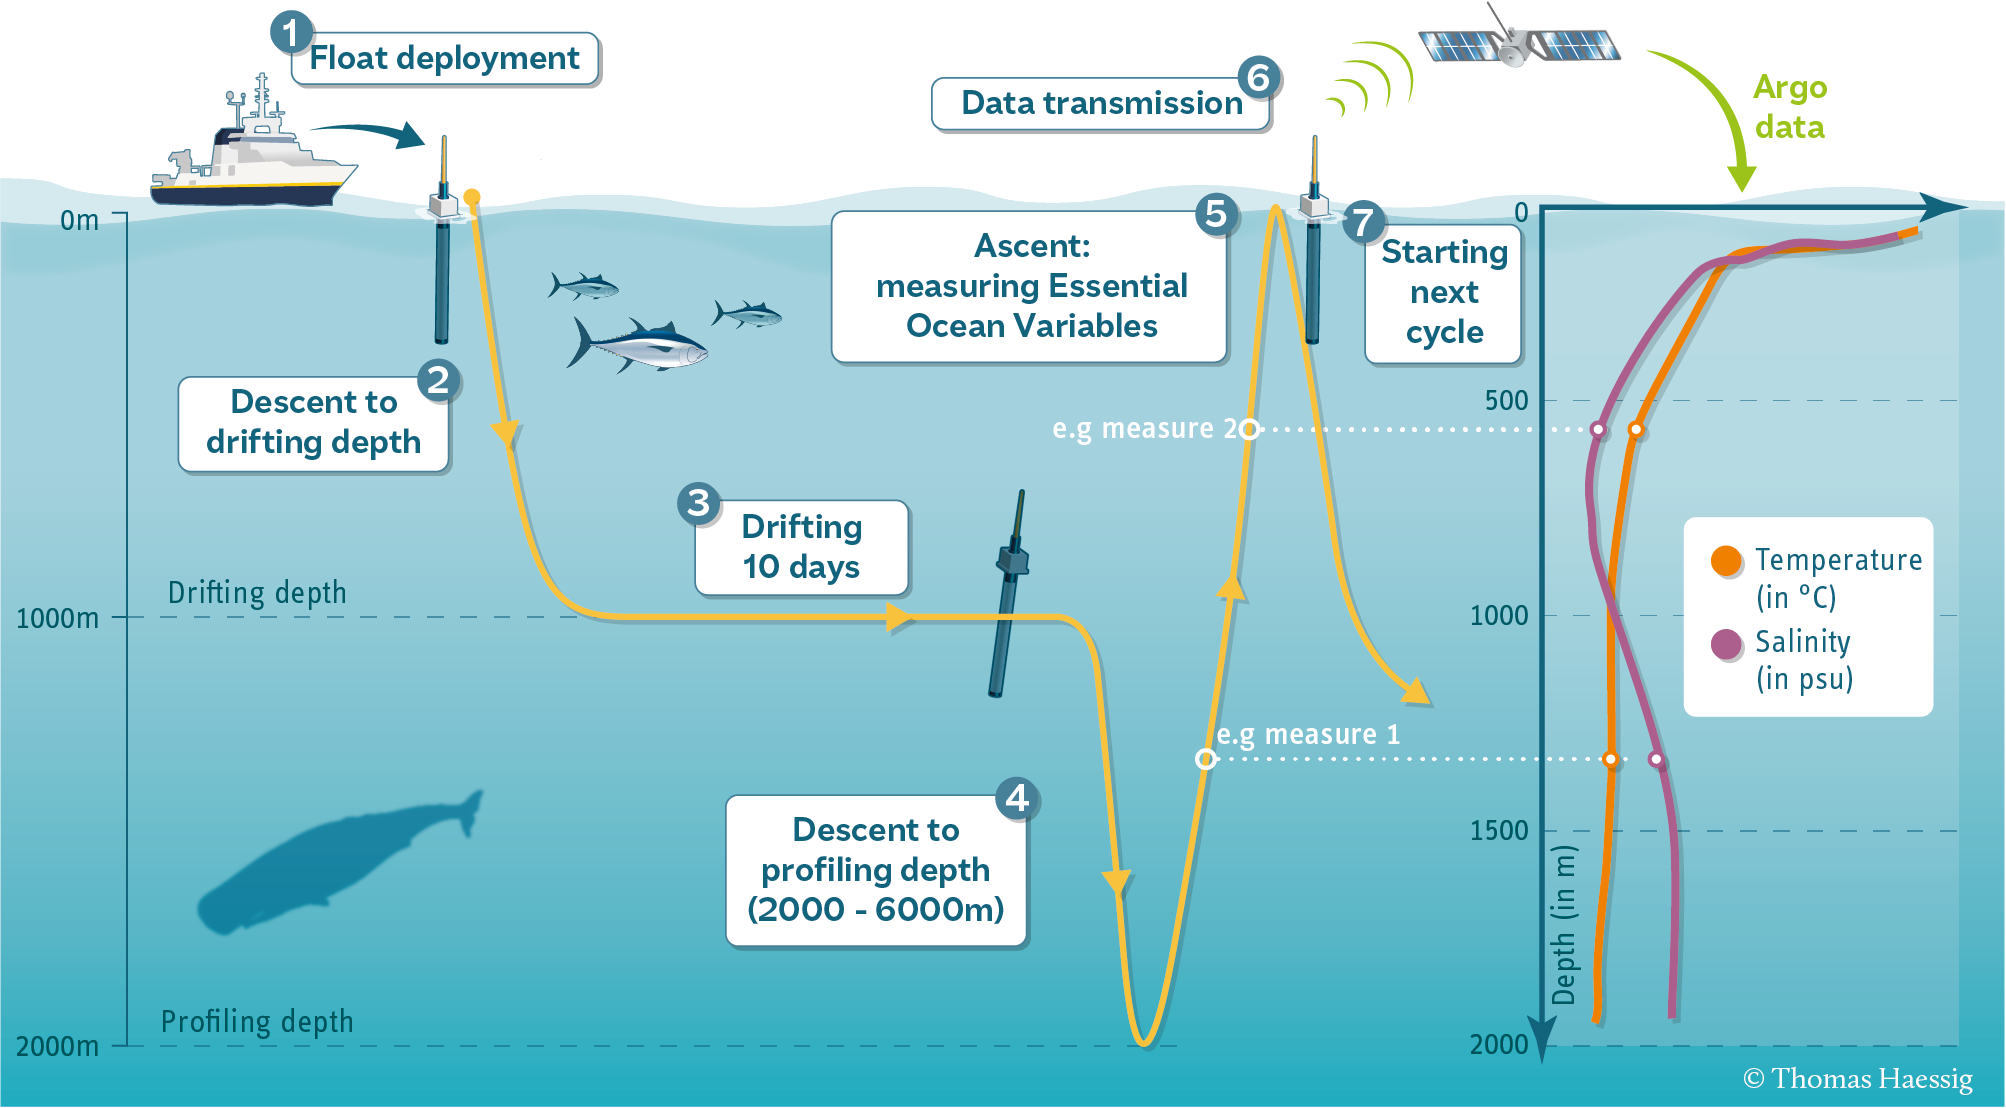


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [2]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [3]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [4]:
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [29]:
P = np.load(files [0])
print(P)



[[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.90002441 1950.         1949.89990234 ... 1950.59997559
  1950.20007324 1949.70007324]
 [1999.30004883 1998.         1998.5        ...           nan
  2000.40002441           nan]]


Then, load the files as `numpy` arrays, for instance using list comprehension

In [32]:
P,date, lat, S, levels, lon, T = [np.load(files[i]) for i in range(7)]
print(T)

[[18.97400093 18.43700027 19.09900093 ... 19.11300087 21.82299995
  20.13100052]
 [18.74099922 18.39999962 19.08200073 ... 18.47200012 19.45999908
  20.125     ]
 [18.37000084 18.37400055 19.06500053 ... 18.22999954 19.26199913
  20.07699966]
 ...
 [ 3.79299998  3.81399989  3.80200005 ...  3.80699992  3.81100011
   3.8599999 ]
 [ 3.76399994  3.77800012  3.75699997 ...  3.75399995  3.74600005
   3.80599999]
 [ 3.74399996  3.74600005  3.7249999  ...         nan  3.71399999
          nan]]


In [28]:
levels

array(['2012-07-13T22:33:06.019200000', '2012-07-23T22:54:59.990400000',
       '2012-08-02T22:55:52.003200000', '2012-08-12T23:08:59.971200000',
       '2012-08-22T23:29:01.968000000', '2012-09-01T23:17:38.976000000',
       '2012-09-12T02:59:18.960000000', '2012-09-21T23:18:37.036800000',
       '2012-10-02T03:00:17.971200000', '2012-10-11T23:13:27.984000000',
       '2012-10-22T02:50:32.006400000', '2012-10-31T23:36:39.974400000',
       '2012-11-11T02:40:46.041600000', '2012-11-20T23:08:29.990400000',
       '2012-12-01T02:47:51.993600000', '2012-12-10T23:23:16.972800000',
       '2012-12-21T02:58:48.979200000', '2012-12-30T23:07:23.030400000',
       '2013-01-10T02:56:43.008000000', '2013-01-19T23:24:26.956800000',
       '2013-01-30T02:43:53.011200000', '2013-02-08T23:15:27.043200000',
       '2013-02-19T01:12:50.976000000', '2013-02-28T23:07:13.008000000',
       '2013-03-11T02:43:30.979200000', '2013-03-20T23:17:22.992000000',
       '2013-03-31T01:50:38.025600000', '2013-04-09

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [33]:
print(levels) #depth

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [34]:
level_arange = np.arange(0, 78)
print(level_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [35]:
np.testing.assert_equal(levels,level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [10]:
level_linspace = np.linspace(0,77, 78)


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [36]:
np.testing.assert_equal(levels,level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [37]:
S.shape, P.shape, T.shape, lon.shape, lat.shape, date.shape, levels.shape

((78, 75), (78, 75), (78, 75), (75,), (75,), (75,), (78,))

Based on the shapes, which dimensions do you think are shared among the arrays?

In [13]:
#some are a matrix, some consist of only col or rows

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [38]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [39]:
!pip install gsw
from gsw import CT_from_t

Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [40]:
conservative_temperature  = CT_from_t(S,T,P)

Calculate the `relative density` using the equation above

In [41]:
relative_density = a*S + b*conservative_temperature + c*conservative_temperature**2

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [42]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

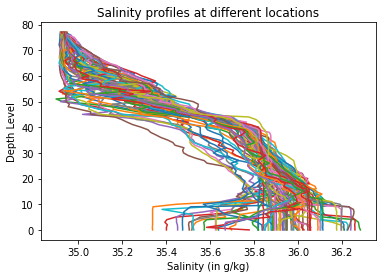

Text(0.5, 1.0, 'Temperature profiles at different sea depth')

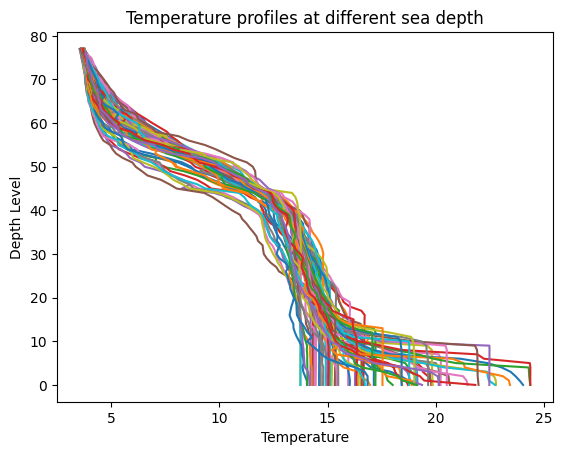

In [44]:
plt.plot(T,levels); # The semi-colon prevents printing the line objects
plt.xlabel("Temperature (°C)") # Takes a string as argument
plt.ylabel("Depth Level")
plt.title("Temperature profiles at different sea depth")


Text(0.5, 1.0, 'Salinity profiles at different sea depth')

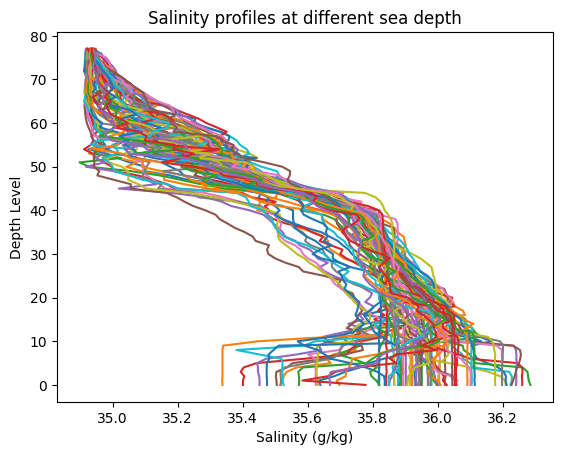

In [48]:
plt.plot(S,levels); # The semi-colon prevents printing the line objects
plt.xlabel("Salinity (g/kg)") # Takes a string as argument
plt.ylabel("Depth Level")
plt.title("Salinity profiles at different sea depth")

Make more plots below:

Text(0.5, 1.0, 'Pressure at different sea depth')

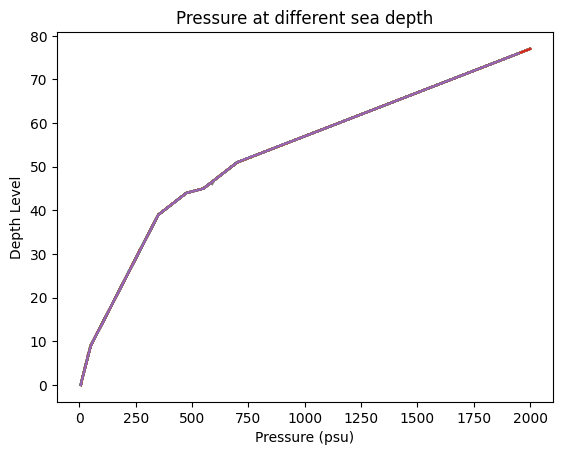

In [47]:
plt.plot(P,levels); # The semi-colon prevents printing the line objects
plt.xlabel("Pressure (psu)") # Takes a string as argument
plt.ylabel("Depth Level")
plt.title("Pressure at different sea depth")

Text(0.5, 1.0, 'Relative density profiles at different sea depth')

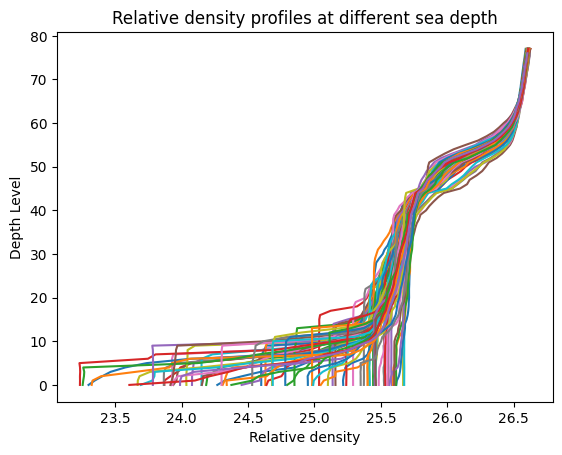

In [49]:
plt.plot(relative_density,levels); # The semi-colon prevents printing the line objects
plt.xlabel("Relative density") # Takes a string as argument
plt.ylabel("Depth Level")
plt.title("Relative density profiles at different sea depth")

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [81]:
unique_levels = np.unique(levels)
T_means = []

# Calculate mean for each unique of levels
for value in unique_levels:
    mean_value = np.mean(T[levels == value])
    T_means.append(mean_value)

print(T_means)




[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 10.804306659698486, 10.497026672363281, 10.17490659713745, 9.834533335367839, 9.486253318786622, 9.197933343251547, 8.660106658935547, 8.123240013122558, 7.602213331858317, 7.152893333435059, 6.742506669362386, 6.395439993540446, 6.0459866714477535, 5.745386651357015, 5.489133326212565, 5.266040007273356, 5.087680002848307, 4.934799976348877, 4.777693341573079, 4.653679997126261, 4.542373336156209, 4.442746639251709, 4.359333327611288, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [82]:
unique_levels = np.unique(levels)
S_means = []

# Calculate mean for each unique of levels
for value in unique_levels:
    mean_value = np.mean(S[levels == value])
    S_means.append(mean_value)

print(S_means)


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 35.41392634073893, 35.381055704752605, 35.348452453613284, 35.31531555175781, 35.28392567952474, 35.26568333943685, 35.23894729614258, 35.21583745320638, 35.196860809326175, 35.18231257120768, 35.16484359741211, 35.15073542277018, 35.125093383789064, 35.101558685302734, 35.08199798583984, 35.06317011515299, 35.04900970458984, 35.03678253173828, 35.0217426554362, 35.011355794270834, 35.00212936401367, 34.99386296590169, 34.9881032816569, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [83]:
unique_levels = np.unique(levels)
P_means = []

# Calculate mean for each unique of levels
for value in unique_levels:
    mean_value = np.mean(P[levels == value])
    P_means.append(mean_value)

print(P_means)

[6.434666713873545, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 575.6840014648437, 600.4240071614583, 625.3080045572916, 650.3453377278646, 675.33333984375, 700.3706754557292, 750.4240071614583, 800.366669921875, 850.3853401692709, 900.4613387044271, 950.450673828125, 1000.3853426106771, 1050.3853466796875, 1100.4573421223959, 1150.452013346354, 1200.4053450520832, 1250.250673828125, 1300.494677734375, 1350.4026839192709, 1400.417345377604, 1450.2573421223958, 1500.4026725260417, 1550.464013671875, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [84]:
unique_levels = np.unique(levels)
RD_means = []

# Calculate mean for each unique of levels
for value in unique_levels:
    mean_value = np.mean(relative_density[levels == value])
    RD_means.append(mean_value)

print(RD_means)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 25.90086615472161, 25.930762943569036, 25.962662970662187, 25.996336939105966, 26.031752941881138, 26.06651761698866, 26.134959169258924, 26.203718293237745, 26.27052918834839, 26.327847596748434, 26.375308713855368, 26.414803539521582, 26.444701693048145, 26.468265680761572, 26.488210656813223, 26.50384344332812, 26.51677094402373, 26.52768415486493, 26.536680142260064, 26.544917084063627, 26.55228620700516, 26.558815189469996, 26.565197868490085, nan, nan, nan, nan, nan, nan, nan, nan, nan]


... and the standard deviations.

In [89]:
unique_levels = np.unique(levels)
T_std = []

# Calculate mean for each unique of levels
for value in unique_levels:
    std_value = np.std(T[levels == value])
    T_std.append(std_value)

print(T_std)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.8420422573693828, 0.9003195408761878, 0.9466151481552936, 0.9902254964387506, 1.0178643476998697, 1.0169077489357536, 1.019442747392289, 0.9798776655898713, 0.9435987797129839, 0.8820775500835555, 0.8293449853338045, 0.7859263032109571, 0.7175590681927168, 0.6835118293880103, 0.6438202466650826, 0.5899033632109869, 0.5507731344122795, 0.5018717489046902, 0.45673872438032553, 0.40853239574752315, 0.3674850380248316, 0.33272584015945805, 0.29968149846903663, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [88]:
unique_levels = np.unique(levels)
S_std = []

# Calculate mean for each unique of levels
for value in unique_levels:
    std_value = np.std(S[levels == value])
    S_std.append(std_value)

print(S_std)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.11644935559690642, 0.12211051159702467, 0.12341583089413913, 0.12609270672716658, 0.12781263730230613, 0.12486204130906542, 0.12508305192763872, 0.12873388411765904, 0.12711569781116575, 0.12208639369213423, 0.11848103109628351, 0.11478619360773701, 0.10416218679642052, 0.1009586951129205, 0.0956563851822425, 0.08961303609758665, 0.08561259722003077, 0.07880694609435836, 0.07300245379052976, 0.0658241382750489, 0.05933736347605408, 0.05371505941228441, 0.048724759881253146, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [87]:
unique_levels = np.unique(levels)
P_std = []

# Calculate mean for each unique of levels
for value in unique_levels:
    std_value = np.std(P[levels == value])
    P_std.append(std_value)

print(P_std)

[0.8534624992402787, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.5931604009151843, 0.28791041456437133, 0.50431883769231, 0.39607669742116997, 0.5808854240899292, 0.5878231049261028, 0.4672860381161154, 0.3844758231507616, 0.4927975046425344, 0.43905790188253185, 0.3142716483228967, 0.28784061383856374, 0.4097801702128266, 0.3936744745135928, 0.2655131224645884, 0.36947740808740065, 0.6117440094196566, 0.34210648238039454, 0.4351193713380236, 0.33283111184323894, 0.52793873231232, 0.5559340937134063, 0.3572676067574, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [85]:
unique_levels = np.unique(levels)
RD_std = []

# Calculate mean for each unique of levels
for value in unique_levels:
    std_value = np.std(relative_density[levels == value])
    RD_std.append(std_value)

print(RD_std)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.06560189137269995, 0.06954326064399248, 0.07525135696735502, 0.08012412247220657, 0.08297409044175909, 0.08501656550852148, 0.08490149857532188, 0.0791805309184766, 0.06847190777606736, 0.05889347133998695, 0.04711212480524957, 0.03604723265055973, 0.02824989728848382, 0.023384447387674177, 0.018219673720567223, 0.014245143169768099, 0.010908606091972783, 0.009238185604635945, 0.008453134495014235, 0.007743260592340522, 0.006947361515218197, 0.006631076951573, 0.006497368965891, nan, nan, nan, nan, nan, nan, nan, nan, nan]


**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

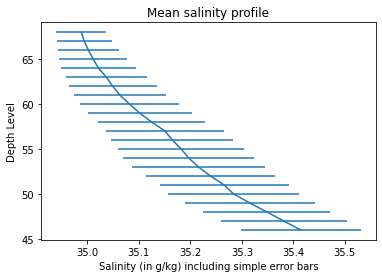

Text(0.5, 1.0, 'Mean Pressure Profile')

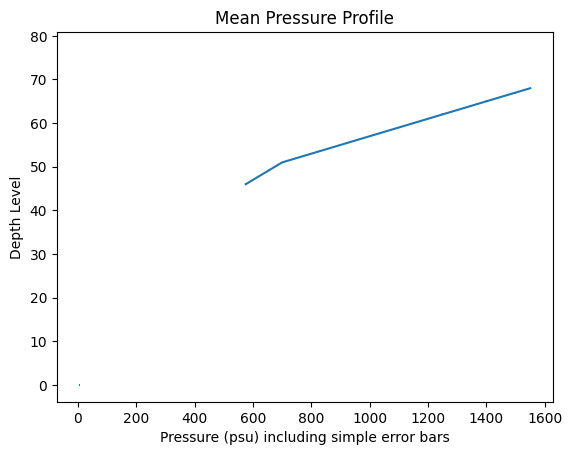

In [102]:
plt.errorbar(P_means,levels,xerr=P_std)
plt.xlabel("Pressure (psu) including simple error bars")
plt.ylabel("Depth Level")
plt.title("Mean Pressure Profile")


Text(0.5, 1.0, 'Mean Temperature Profile')

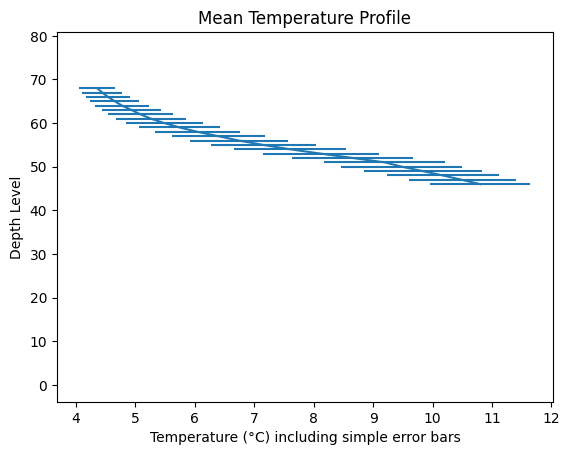

In [99]:
plt.errorbar(T_means,levels,xerr=T_std)
plt.xlabel("Temperature (°C) including simple error bars")
plt.ylabel("Depth Level")
plt.title("Mean Temperature Profile")

Text(0.5, 1.0, 'Mean Salinity Profile')

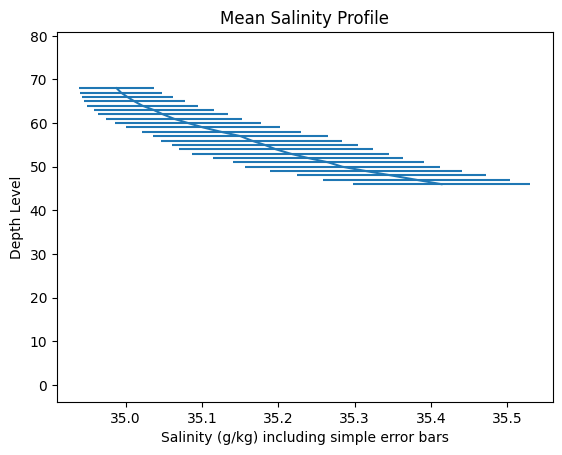

In [101]:
plt.errorbar(S_means,levels,xerr=S_std)
plt.xlabel("Salinity (g/kg) including simple error bars")
plt.ylabel("Depth Level")
plt.title("Mean Salinity Profile")

Text(0.5, 1.0, 'Mean Relative Density Profile')

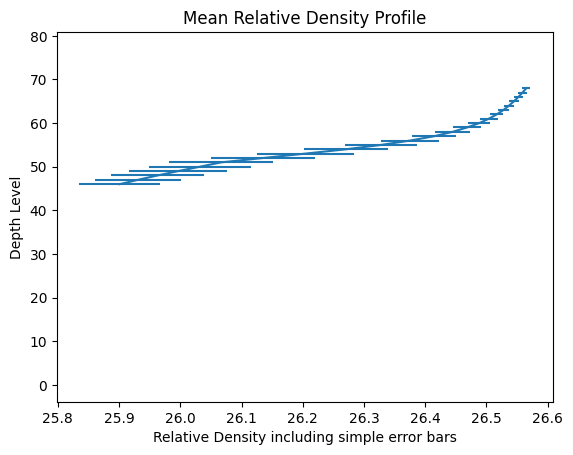

In [93]:
plt.errorbar(RD_means,levels,xerr=RD_std)
plt.xlabel("Relative Density including simple error bars")
plt.ylabel("Depth Level")
plt.title("Mean Relative Density Profile")


Three more plots and we'll be all set! 🙂

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

In [110]:
unique_levels = np.unique(levels)
T_means = []

# Calculate mean for each unique of levels
for value in unique_levels:
    mean_value = np.nanmean(T[levels == value])
    T_means.append(mean_value)

print(T_means)



[17.601726022485185, 17.572236087587143, 17.514583296246, 17.423263947168987, 17.249438377275858, 17.037301337882266, 16.767876611997004, 16.446095884662785, 16.17439195272085, 16.045013556609284, 15.6582702301644, 15.460729598999023, 15.261148620296169, 15.124891912614977, 14.991337827734045, 14.901608080477327, 14.819905435716784, 14.745351391869622, 14.668229708800444, 14.585026998777646, 14.497324337830415, 14.419040525281751, 14.354121633478114, 14.271027023727829, 14.190810822151803, 14.114878383842674, 14.0434729344136, 13.980675658664188, 13.909945951925742, 13.83274319365218, 13.761391961896742, 13.69836478619962, 13.623351316194277, 13.541851314338478, 13.46647294791969, 13.39395945780986, 13.325418910464725, 13.252054034052668, 13.181310821223903, 13.102337824331748, 12.892689163620407, 12.677959429251182, 12.464918896958634, 12.217851303719186, 11.98270268053622, 11.128108101922113, 10.804306659698486, 10.497026672363281, 10.17490659713745, 9.834533335367839, 9.486253318786

Similarly, recalculate the standard deviations ignoring the missing values.

In [111]:
unique_levels = np.unique(levels)
T_std = []

# Calculate mean for each unique of levels
for value in unique_levels:
    std_value = np.nanstd(T[levels == value])
    T_std.append(std_value)

print(T_std)

[2.9250089780535413, 2.8640559124653917, 2.8332456283721585, 2.7511235276501633, 2.6024842197951767, 2.4264916470714115, 2.202205889674265, 1.997525433947468, 1.7910586224944238, 1.7413279534513901, 1.266084647869944, 1.0785759615786734, 0.8976123589811775, 0.797484787977994, 0.6852532843945482, 0.6394096045358345, 0.618356346077013, 0.5938787675372313, 0.560107355056942, 0.5500910703858891, 0.5318379379162219, 0.5263408933087826, 0.526682586732846, 0.5100918248254591, 0.493768382536326, 0.4898021364554433, 0.48551873951513125, 0.4851617065119204, 0.4924453594271955, 0.505573308085782, 0.5088171764593393, 0.5048263306937404, 0.5009328364630139, 0.5141127091067528, 0.5096200188331722, 0.5139994852019847, 0.5254458371105406, 0.5318287306961401, 0.5466500962620878, 0.550609016551194, 0.5606621600851147, 0.5793758767176573, 0.5989958037227289, 0.6339286191667587, 0.7064005710402685, 0.8577526918401907, 0.8420422573693828, 0.9003195408761878, 0.9466151481552936, 0.9902254964387506, 1.017864

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

Text(0.5, 1.0, 'ARGO Float Locations')

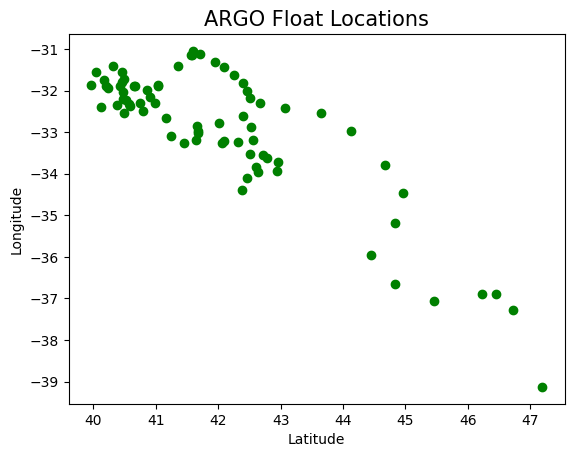

In [108]:
plt.scatter(lat,lon, color = "green")
plt.xlabel("Latitude", fontsize = 10) # Fancy bonuses

plt.ylabel("Longitude", fontsize = 10) # More fancy bonuses
plt.title('ARGO Float Locations', fontsize=15)

